# Sabermetrics

### Goal: 

1. Using Sean Lahman's Baseball Database preceding from 2002, I would like to pick 10 offensive players that keeps the payroll under 20 million dollars. 
2. Predict how many games this team would win in a 162 game season

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn import linear_model

In [4]:
teams = pd.read_csv("C:/Users/Ron/Downloads/lahman-csv_2014-02-14/teams.csv")
players = pd.read_csv("C:/Users/Ron/Downloads/lahman-csv_2014-02-14/batting.csv")
salaries = pd.read_csv("C:/Users/Ron/Downloads/lahman-csv_2014-02-14/salaries.csv")
fielding = pd.read_csv("C:/Users/Ron/Downloads/lahman-csv_2014-02-14/fielding.csv")
master = pd.read_csv("C:/Users/Ron/Downloads/lahman-csv_2014-02-14/master.csv")
display(teams.head())
display(players.head())
display(salaries.head())
display(fielding.head())
display(master.head())

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1,aardsda01,2006,1,CHN,NL,45,43.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
2,aardsda01,2007,1,CHA,AL,25,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,aardsda01,2008,1,BOS,AL,47,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
4,aardsda01,2009,1,SEA,AL,73,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,ansonca01,1871,1,RC1,NaN,1B,1,NaN,NaN,7.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,biermch01,1871,1,FW1,NaN,1B,1,NaN,NaN,9.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
2,carleji01,1871,1,CL1,NaN,1B,29,NaN,NaN,295.0,4.0,34.0,10.0,NaN,NaN,NaN,NaN,NaN
3,connone01,1871,1,TRO,NaN,1B,4,NaN,NaN,35.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN
4,cravebi01,1871,1,TRO,NaN,1B,2,NaN,NaN,18.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,205.0,75.0,R,R,2004-04-06,2013-09-28,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


Creating a dataframe that includes the median salary of each player and the player's first and last name

In [5]:
medSal = salaries.copy()
medSal = medSal[['playerID','salary']]
medSal = medSal.groupby(['playerID']).median()
names = master[["playerID","nameFirst" ,"nameLast"]]
medSal = medSal.merge(names,on = 'playerID')
medSal

,playerID,salary,nameFirst,nameLast
0,aardsda01,419000.0,David,Aardsma
1,aasedo01,612500.0,Don,Aase
2,abadan01,327000.0,Andy,Abad
3,abadfe01,451500.0,Fernando,Abad
4,abbotje01,255000.0,Jeff,Abbott
...,...,...,...,...
4663,zuberjo01,109000.0,Jon,Zuber
4664,zuletju01,200000.0,Julio,Zuleta
4665,zumayjo01,577500.0,Joel,Zumaya
4666,zupcibo01,109000.0,Bob,Zupcic


In [6]:
stats = teams.copy()
stats = stats[(stats['G'] == 162) & (stats['yearID']>1947)]
stats

#stats['Total'] = stats.loc['2B':'BB'].sum(axis=1)
stats['S'] = stats['H'] - (stats['2B']+stats['3B'] + stats['HR'])
#Plate appearances are base on balls plus at bats (BB+AB)
stats ['PA'] = stats['BB'] + stats['AB']
stats ['S / PA'] = stats['S'] / stats['PA']
stats ['2B / PA'] = stats['2B'] / stats['PA']
stats ['3B / PA'] = stats['3B'] / stats['PA']
stats ['HR / PA'] = stats['HR'] / stats['PA']
stats ['BB / PA'] = stats['BB'] / stats['PA']
stats = stats[['teamID','yearID','W', 'S / PA' , '2B / PA' , '3B / PA','HR / PA', 'BB / PA']]
stats

,teamID,yearID,W,S / PA,2B / PA,3B / PA,HR / PA,BB / PA
1366,LAA,1961,70,0.147748,0.035708,0.003604,0.030958,0.111548
1367,KC1,1961,61,0.164751,0.035982,0.007829,0.014993,0.096618
1377,NYA,1962,96,0.167148,0.038536,0.004656,0.031952,0.093770
1379,LAA,1962,86,0.159482,0.038027,0.005737,0.022455,0.098672
1381,CHA,1962,85,0.165797,0.040756,0.009129,0.014998,0.101076
...,...,...,...,...,...,...,...,...
2740,LAN,2013,92,0.169432,0.047092,0.002849,0.023127,0.079772
2741,ARI,2013,81,0.162228,0.048749,0.005004,0.020985,0.083777
2742,SDN,2013,76,0.155582,0.041110,0.004345,0.024398,0.078041
2743,SFN,2013,76,0.170071,0.046504,0.005813,0.017771,0.077894


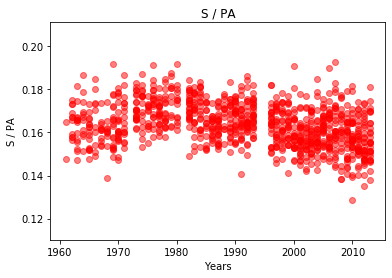

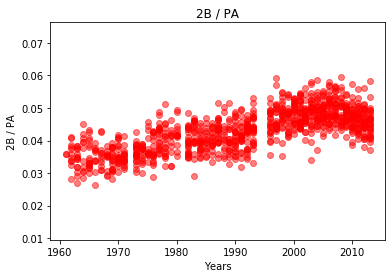

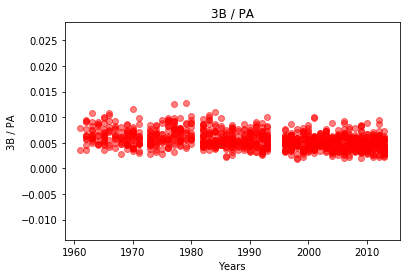

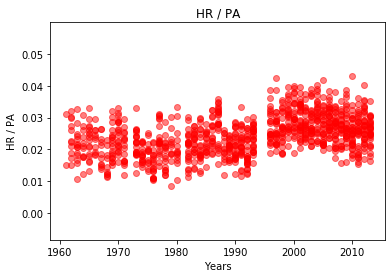

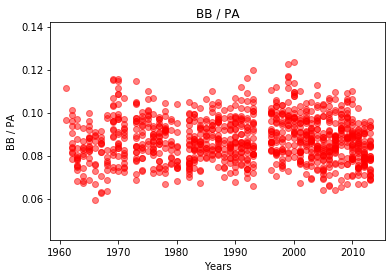

In [7]:
for i in ['S / PA' , '2B / PA' , '3B / PA' ,'HR / PA','BB / PA' ]:
    plt.scatter(stats['yearID'],stats[i] ,alpha = 0.5 , c = 'r')
    plt.title(i)
    plt.xlabel("Years")
    plt.ylabel(i)
    plt.show()

Noticeable trends in the per plate appearance rates
- Single hits had the highest per plate appearance
- Single hits frequency were notably decreasing by year
- Double hits frequency were notable increasing by year
- Triple hits frequency did not really change and stayed almost the same through thte years
- Home runs hit frequencys were increased slighlty each year
- There were zeros in the data from early 1970s, early 1980s, and mid 1990s to late 2000s. The zeros were caused by reasons unknown to me

Preparing the data for linear regression model for predicting the nubmer of wins by centering data

In [8]:
#for i in ['S / PA' , '2B / PA' , '3B / PA' ,'HR / PA','BB / PA' ]:
#    stats[i] = preprocessing.scale(stats[i])
  
def meanNormalizeRates(df):
        subRates = df[['S / PA' , '2B / PA' , '3B / PA' ,'HR / PA','BB / PA' ]]
        df[['S / PA' , '2B / PA' , '3B / PA' ,'HR / PA','BB / PA' ]] = subRates - subRates.mean(axis=0)
        return df
stats = stats.groupby('yearID').apply(meanNormalizeRates)
stats

,teamID,yearID,W,S / PA,2B / PA,3B / PA,HR / PA,BB / PA
1366,LAA,1961,70,-0.008502,-0.000137,-0.002113,0.007983,0.007465
1367,KC1,1961,61,0.008502,0.000137,0.002113,-0.007983,-0.007465
1377,NYA,1962,96,0.001516,0.002683,-0.002121,0.008141,0.005180
1379,LAA,1962,86,-0.006150,0.002174,-0.001040,-0.001356,0.010082
1381,CHA,1962,85,0.000165,0.004904,0.002352,-0.008813,0.012486
...,...,...,...,...,...,...,...,...
2740,LAN,2013,92,0.012259,0.001658,-0.001462,-0.002490,-0.000770
2741,ARI,2013,81,0.005054,0.003314,0.000693,-0.004632,0.003235
2742,SDN,2013,76,-0.001592,-0.004325,0.000034,-0.001219,-0.002501
2743,SFN,2013,76,0.012898,0.001069,0.001502,-0.007846,-0.002648


In [9]:
clf = linear_model.LinearRegression()

stat_train = stats[stats.yearID < 2002]
stat_test = stats[stats.yearID >= 2002]

XX_train = stat_train[['S / PA' , '2B / PA' , '3B / PA' ,'HR / PA','BB / PA' ]].values
XX_test = stat_test[['S / PA' , '2B / PA' , '3B / PA' ,'HR / PA','BB / PA' ]].values

YY_train = stat_train[['W']].values
YY_test = stat_test[['W']].values
clf.fit(XX_train,YY_train)
clf.coef_

print("Mean squared error:{}".format(np.mean((YY_test - clf.predict(XX_test))**2)))

Mean squared error:83.82304248976098


In [10]:
playerstats = players.copy()
playerstats = playerstats[(playerstats['yearID'] > 1947)]
playerstats['PA'] = playerstats['BB'] + playerstats['AB']
playerstats = playerstats[playerstats['PA'] >= 500]

playerstats['S'] = playerstats['H'] - playerstats['2B'] - playerstats['3B'] - playerstats['HR']
playerstats ['S / PA'] = playerstats['S'] / playerstats['PA']
playerstats ['2B / PA'] = playerstats['2B'] / playerstats['PA']
playerstats ['3B / PA'] = playerstats['3B'] / playerstats['PA']
playerstats ['HR / PA'] = playerstats['HR'] / playerstats['PA']
playerstats ['BB / PA'] = playerstats['BB'] / playerstats['PA']

playerstats = playerstats[['playerID','yearID', 'S / PA' , '2B / PA' , '3B / PA','HR / PA', 'BB / PA']]
playerstats = playerstats.groupby('yearID').apply(meanNormalizeRates) 
playerstats.head()

,playerID,yearID,S / PA,2B / PA,3B / PA,HR / PA,BB / PA
8,aaronha01,1955,0.001060,0.018570,0.005585,0.011337,-0.027249
9,aaronha01,1956,0.021581,0.013895,0.012578,0.009438,-0.044519
10,aaronha01,1957,0.005503,-0.002189,0.000537,0.036908,-0.012659
11,aaronha01,1958,0.018367,0.011015,-0.002219,0.015398,-0.007762
12,aaronha01,1959,0.016261,0.025762,0.002743,0.028368,-0.022898


In [11]:
playerLS = playerstats.drop(['yearID'], axis=1)
playerLS = playerLS.groupby('playerID').mean()
playerLS = playerLS.merge(master, on = 'playerID')
playerLS = playerLS[['playerID','debut', 'finalGame','S / PA' , '2B / PA' , '3B / PA','HR / PA', 'BB / PA']]
playerLS["finalGame"] = playerLS['finalGame'].astype(str).str[0:4].astype(int)
playerLS["debut"] = playerLS['debut'].astype(str).str[0:4].astype(int)

from collections import defaultdict
def getPos(df):
    positions = df['POS']
    d = defaultdict(int)
    for pos in positions:
        d[pos]+=1
    result = max(d.items(),key=lambda x:x[1])
    return result[0]

positions = fielding.groupby("playerID").apply(getPos)
positions = positions.reset_index()
positions = positions.rename(columns = {0:"POS"})
playerLS = playerLS.merge(positions, on= "playerID")

playerLS = playerLS.rename(columns={"debut": "Start Year", "finalGame": "End Year"})
playerLS

,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS
0,aaronha01,1954,1976,-0.007039,0.006542,-0.000249,0.027814,0.009415,OF
1,abramca01,1949,1956,0.013463,-0.023915,0.002384,0.003842,0.019455,OF
2,abreubo01,1996,2012,-0.008230,0.006438,0.000983,-0.003154,0.050532,RF
3,ackledu01,2011,2013,-0.009186,-0.016607,-0.002044,-0.015187,0.001574,1B
4,adairje01,1958,1970,0.012235,0.003353,-0.002105,-0.013016,-0.037399,2B
...,...,...,...,...,...,...,...,...,...
1532,zernigu01,1949,1959,-0.020857,-0.008680,-0.003715,0.029474,-0.012651,OF
1533,zimmedo01,1954,1965,-0.017461,0.009122,-0.000421,-0.005708,-0.050435,3B
1534,zimmery01,2005,2013,-0.006366,0.004768,-0.001699,0.006928,0.005074,3B
1535,ziskri01,1971,1983,-0.004883,0.001124,-0.003160,0.013099,0.007169,LF


In [12]:
avgVal = playerLS[['S / PA' , '2B / PA' , '3B / PA','HR / PA', 'BB / PA']].values
playerLS["OPW"] = clf.predict(avgVal)
playerLS

,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW
0,aaronha01,1954,1976,-0.007039,0.006542,-0.000249,0.027814,0.009415,OF,108.737373
1,abramca01,1949,1956,0.013463,-0.023915,0.002384,0.003842,0.019455,OF,92.575472
2,abreubo01,1996,2012,-0.008230,0.006438,0.000983,-0.003154,0.050532,RF,104.121778
3,ackledu01,2011,2013,-0.009186,-0.016607,-0.002044,-0.015187,0.001574,1B,53.831767
4,adairje01,1958,1970,0.012235,0.003353,-0.002105,-0.013016,-0.037399,2B,56.467482
...,...,...,...,...,...,...,...,...,...,...
1532,zernigu01,1949,1959,-0.020857,-0.008680,-0.003715,0.029474,-0.012651,OF,80.383271
1533,zimmedo01,1954,1965,-0.017461,0.009122,-0.000421,-0.005708,-0.050435,3B,45.162429
1534,zimmery01,2005,2013,-0.006366,0.004768,-0.001699,0.006928,0.005074,3B,86.579924
1535,ziskri01,1971,1983,-0.004883,0.001124,-0.003160,0.013099,0.007169,LF,90.272294


In [13]:
playerLS = playerLS.merge(medSal, on=['playerID'],how='inner')
playerLS

,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast
0,abreubo01,1996,2012,-0.008230,0.006438,0.000983,-0.003154,0.050532,RF,104.121778,9000000.0,Bobby,Abreu
1,ackledu01,2011,2013,-0.009186,-0.016607,-0.002044,-0.015187,0.001574,1B,53.831767,2400000.0,Dustin,Ackley
2,adamsru01,2004,2009,-0.007867,-0.001289,0.004160,-0.017533,0.002672,SS,67.496507,329500.0,Russ,Adams
3,alfoned01,1995,2006,0.013541,-0.002185,-0.003255,-0.006373,0.010738,2B,83.462334,4112500.0,Edgardo,Alfonzo
4,alicelu01,1988,2002,0.035625,-0.009597,0.007988,-0.026156,-0.006580,2B,78.561778,750000.0,Luis,Alicea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,zaungr01,1995,2010,-0.008357,-0.016634,-0.003284,-0.010903,0.052494,C,82.532772,1000000.0,Gregg,Zaun
972,zeileto01,1989,2004,-0.007849,-0.002010,-0.002854,-0.002622,0.016118,3B,78.751566,2700000.0,Todd,Zeile
973,zimmery01,2005,2013,-0.006366,0.004768,-0.001699,0.006928,0.005074,3B,86.579924,6350000.0,Ryan,Zimmerman
974,ziskri01,1971,1983,-0.004883,0.001124,-0.003160,0.013099,0.007169,LF,90.272294,272500.0,Richie,Zisk


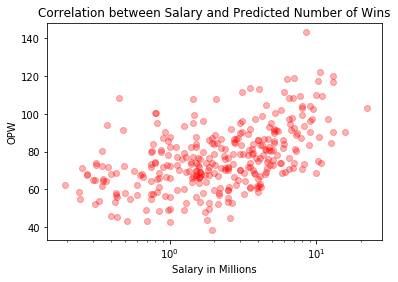

In [16]:
subLS = playerLS[(playerLS["Start Year"] <= 2002) & 
                  (playerLS["End Year"] >= 2003) &
                  (playerLS["End Year"] - playerLS["Start Year"] >= 3)]

fig=plt.figure()
ax = fig.gca()
plt.scatter(subLS['salary']/10**6,subLS['OPW'],alpha=0.3, c='red')
ax.set_xscale("log")
plt.xlabel("Salary in Millions")
plt.ylabel("OPW")
plt.title("Correlation between Salary and Predicted Number of Wins")
plt.show()

Picking 10 player from each of positions with a budget of 20 million dollars

In [17]:
#budget is 20 million
#since its 20 million, we would like each player to be about 2 million each 
#with high OPW
for i in ['C', '1B', '2B', '3B', 'SS', 'LF', 'CF', 'RF', 'DH', 'OF']:
    certainPOS = subLS[subLS['POS']==i]
    display(certainPOS)

,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast
22,ausmubr01,1993,2010,0.005971,-0.005075,0.002907,-0.021224,0.004457,C,69.267774,1600000.0,Brad,Ausmus
89,bordepa01,1988,2005,-0.016879,0.008572,-0.003931,-0.004039,-0.043964,C,45.938481,400000.0,Pat,Borders
220,davisbe01,1998,2004,-0.015761,-0.012295,-0.005395,-0.014723,0.031222,C,64.202325,350000.0,Ben,Davis
283,estrajo01,2001,2008,0.033584,0.020424,-0.005104,-0.016195,-0.019086,C,79.077882,1250000.0,Johnny,Estrada
420,hernara02,1999,2013,-0.005240,-0.002867,-0.002738,0.007834,-0.022882,C,68.795820,3200000.0,Ramon,Hernandez
443,hundlto01,1990,2003,-0.053698,-0.002839,-0.002554,0.029177,0.046759,C,97.446895,3825000.0,Todd,Hundley
499,kendaja01,1996,2010,0.041743,-0.003128,-0.001346,-0.024286,-0.009483,C,74.349557,4625000.0,Jason,Kendall
546,liebemi01,1994,2007,0.009310,0.006571,-0.002959,0.001012,-0.024795,C,73.901106,3541666.5,Mike,Lieberthal
550,loducpa01,1998,2008,0.032506,0.011284,-0.003063,-0.021579,-0.038831,C,61.767380,4066667.0,Paul,Lo Duca
558,lopezja01,1992,2006,0.012699,-0.008298,-0.002597,0.013663,-0.035622,C,74.191340,5625000.0,Javy,Lopez


,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast
28,bagweje01,1991,2005,-0.021194,0.002799,-0.002027,0.014081,0.053185,1B,108.198137,6875000.0,Jeff,Bagwell
65,berkmla01,1999,2013,-0.021989,0.003858,-0.001269,0.016979,0.064240,1B,117.274903,10250000.0,Lance,Berkman
74,blakeca01,1999,2011,-0.018412,0.001738,-0.001059,0.001071,-0.006604,1B,68.587176,3750000.0,Casey,Blake
155,caseyse01,1997,2008,0.031637,0.007311,-0.002680,-0.005532,-0.013871,1B,86.275986,4000000.0,Sean,Casey
179,clarkto02,1995,2009,-0.017376,-0.002058,-0.003880,0.015912,0.014301,1B,87.427692,900000.0,Tony,Clark
183,colbrgr01,1992,2004,0.015868,-0.005180,-0.002701,0.001517,-0.058986,1B,54.934189,750000.0,Greg,Colbrunn
189,coomero01,1995,2003,0.025291,-0.002552,-0.002857,-0.008046,-0.054555,1B,55.071792,537500.0,Ron,Coomer
210,cuddymi01,2001,2013,-0.000800,0.003551,0.002107,0.002569,-0.001714,1B,86.058528,5916666.0,Michael,Cuddyer
216,daubabr01,1998,2005,-0.038549,0.008036,-0.001657,0.002788,-0.023445,1B,53.234560,425000.0,Brian,Daubach
236,delgaca01,1993,2009,-0.038503,0.007053,-0.003178,0.022686,0.033912,1B,97.337267,12000000.0,Carlos,Delgado


,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast
3,alfoned01,1995,2006,0.013541,-0.002185,-0.003255,-0.006373,0.010738,2B,83.462334,4112500.0,Edgardo,Alfonzo
7,alomaro01,1988,2004,0.022177,0.001685,0.002648,-0.009330,0.004500,2B,90.851636,5466667.0,Roberto,Alomar
14,anderma02,1998,2009,0.017891,0.000812,0.001241,-0.019744,-0.026076,2B,62.080060,600000.0,Marlon,Anderson
27,baergca01,1990,2005,0.038943,-0.001693,-0.001972,-0.005899,-0.041337,2B,72.227348,1000000.0,Carlos,Baerga
55,bellhma01,1997,2007,-0.039016,0.002195,0.001311,0.005503,0.046596,2B,91.702735,477500.0,Mark,Bellhorn
56,belliro01,1998,2010,0.006019,0.008688,-0.000005,-0.014995,-0.005645,2B,72.718631,962500.0,Ronnie,Belliard
73,biggicr01,1988,2007,0.003201,0.005607,-0.001508,-0.007147,-0.004944,2B,75.096550,4000000.0,Craig,Biggio
88,boonebr01,1992,2005,-0.009441,-0.000124,-0.001751,0.002412,-0.021645,2B,65.052253,2900000.0,Bret,Boone
127,bushho01,1997,2004,0.069171,0.001220,0.002231,-0.025900,-0.061257,2B,67.012291,1450000.0,Homer,Bush
137,cairomi01,1996,2012,0.020650,-0.003396,0.004172,-0.024328,-0.050061,2B,48.670562,850000.0,Miguel,Cairo


,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast
43,batisto01,1996,2007,-0.028373,-0.006359,-0.002942,0.015217,-0.046080,3B,49.201175,1250000.0,Tony,Batista
51,bellda01,1995,2006,-0.002277,-0.000523,-0.002798,-0.006223,-0.009719,3B,66.164709,1587500.0,David,Bell
59,beltrad01,1998,2013,0.000980,0.002410,-0.001710,0.008713,-0.025311,3B,75.261930,10200000.0,Adrian,Beltre
75,blaloha01,2002,2010,-0.003698,-0.002885,-0.001894,0.004979,-0.011342,3B,74.026163,1950000.0,Hank,Blalock
86,booneaa01,1997,2009,-0.012194,-0.003036,-0.000326,-0.002131,-0.028524,3B,56.448293,925000.0,Aaron,Boone
126,burrose01,2002,2012,0.046928,-0.007234,0.002666,-0.025845,-0.028664,3B,68.523749,432500.0,Sean,Burroughs
159,castivi02,1991,2006,-0.002688,-0.000627,-0.002061,0.014072,-0.036409,3B,70.371456,3000000.0,Vinny,Castilla
171,chaveer01,1998,2013,-0.022533,-0.000796,-0.001812,0.012185,0.013520,3B,84.115211,3675000.0,Eric,Chavez
175,cirilje01,1994,2007,0.030818,0.007398,-0.001864,-0.014850,-0.007289,3B,82.249637,1500000.0,Jeff,Cirillo
202,credejo01,2000,2009,-0.014854,-0.000168,-0.004225,0.008169,-0.038506,3B,55.659815,2500000.0,Joe,Crede


,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast
21,aurilri01,1995,2009,0.009741,-0.002436,-0.001822,0.000048,-0.026483,SS,69.416652,1300000.0,Rich,Aurilia
57,bellja01,1986,2003,-0.008560,-0.001103,0.003129,-0.005559,0.003883,SS,76.865915,3900000.0,Jay,Bell
68,berroan01,2001,2009,0.023023,-0.008419,0.004971,-0.013109,-0.054268,SS,55.815997,436250.0,Angel,Berroa
90,bordimi01,1990,2003,0.011486,-0.008216,-0.000272,-0.019328,-0.018220,SS,57.046016,2166666.5,Mike,Bordick
136,cabreor01,1997,2011,0.017159,0.007808,-0.002432,-0.018745,-0.025126,SS,62.207381,2850000.0,Orlando,Cabrera
174,cintral01,2001,2009,0.012135,0.000669,0.006660,-0.027437,-0.044829,SS,49.024635,980000.0,Alex,Cintron
181,claytro01,1991,2007,0.010081,-0.005006,0.001681,-0.018361,-0.027673,SS,56.062494,1500000.0,Royce,Clayton
205,cruzde01,1997,2005,0.019840,0.008315,-0.001473,-0.015183,-0.073432,SS,43.273846,700000.0,Deivi,Cruz
267,eckstda01,2001,2010,0.047719,-0.012284,-0.000250,-0.027216,-0.025898,SS,63.441733,1575000.0,David,Eckstein
287,everead01,2001,2011,-0.006816,-0.003480,0.001877,-0.018105,-0.039102,SS,42.544075,1000000.0,Adam,Everett


,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast
5,allench01,1999,2005,0.023137,-0.009622,0.000118,-0.016476,-0.031330,LF,58.636731,240000.0,Chad,Allen
124,burrepa01,2000,2011,-0.043301,-0.005846,-0.002688,0.014357,0.053907,LF,92.328964,7000000.0,Pat,Burrell
131,byrneer01,2000,2010,-0.007429,0.003969,0.001972,0.002336,-0.023573,LF,71.256482,2225000.0,Eric,Byrnes
193,cordewi01,1992,2005,0.001418,0.007807,-0.001353,-0.008728,-0.038326,LF,56.974833,600000.0,Wil,Cordero
194,cordoma01,1995,2003,-0.007869,0.007221,-0.001050,0.000268,-0.011305,LF,73.658942,1400000.0,Marty,Cordova
201,crawfca02,2002,2013,0.031397,-0.007875,0.013456,-0.012196,-0.039673,LF,78.363458,5375000.0,Carl,Crawford
237,delluda01,1997,2009,-0.050673,-0.018869,0.004528,0.024153,0.057238,LF,100.483979,812500.0,David,Dellucci
258,dunnad01,2001,2013,-0.060540,-0.009119,-0.003733,0.026123,0.066696,LF,97.106042,9250000.0,Adam,Dunn
301,floydcl01,1993,2009,-0.012381,0.007814,-0.000418,0.012757,-0.003460,LF,86.949899,2750000.0,Cliff,Floyd
311,freelry01,2001,2009,0.008675,-0.004442,0.003689,-0.023475,0.018887,LF,77.340966,1300000.0,Ryan,Freel


,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast
60,beltrca01,1998,2013,-0.008765,-0.002298,0.002524,0.009635,0.007891,CF,90.487148,13000000.0,Carlos,Beltran
64,bergepe01,1999,2004,-0.008459,-0.007930,0.006785,-0.027492,-0.004383,CF,54.899183,246250.0,Peter,Bergeron
130,byrdma01,2002,2013,0.020605,0.011654,-0.000660,-0.010324,-0.032454,CF,71.298208,2400000.0,Marlon,Byrd
140,camermi01,1995,2011,-0.038480,-0.001186,0.003111,0.003055,0.018971,CF,76.195467,4666667.0,Mike,Cameron
170,chaveen01,2001,2013,0.020309,-0.008940,0.005114,-0.024326,-0.037507,CF,53.327710,1612500.0,Endy,Chavez
203,crispco01,2002,2013,0.007646,-0.001635,0.003260,-0.009317,-0.009107,CF,75.399372,5041666.5,Coco,Crisp
268,edmonji01,1993,2010,-0.027359,0.005619,-0.002631,0.021601,0.038543,CF,104.551797,4500000.0,Jim,Edmonds
276,erstada01,1996,2009,0.024967,0.000249,-0.000010,-0.013720,-0.024205,CF,70.176798,2500000.0,Darin,Erstad
298,finlest01,1989,2007,-0.002990,-0.004116,0.007478,-0.001002,-0.014033,CF,78.006587,3400000.0,Steve,Finley
342,glanvdo01,1996,2004,0.037578,-0.008015,0.002658,-0.020221,-0.048691,CF,57.792384,775000.0,Doug,Glanville


,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast
0,abreubo01,1996,2012,-0.008230,0.006438,0.000983,-0.003154,0.050532,RF,104.121778,9000000.0,Bobby,Abreu
495,kearnau01,2002,2013,-0.007955,-0.000015,-0.003668,-0.007717,0.012791,RF,72.686080,1115000.0,Austin,Kearns
678,ordonma01,1997,2011,0.019869,0.006206,-0.002457,0.005908,-0.012039,RF,90.518772,9000000.0,Magglio,Ordonez
767,riverju01,2001,2012,0.015037,-0.009049,-0.003479,0.010980,-0.033744,RF,72.726282,2025000.0,Juan,Rivera
850,suzukic01,2001,2013,0.080711,-0.016796,0.003720,-0.020869,-0.033180,RF,84.751050,12500000.0,Ichiro,Suzuki
927,werthja01,2002,2013,-0.015295,-0.000697,-0.003564,0.012380,0.032882,RF,96.026221,1700000.0,Jayson,Werth


,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast
161,catalfr01,1997,2010,0.030664,0.011376,0.005171,-0.011510,-0.023743,DH,86.514575,2250000.0,Frank,Catalanotto
309,francju01,1982,2007,0.037530,-0.001414,0.000457,-0.010853,-0.007252,DH,87.599931,1000000.0,Julio,Franco
384,hafnetr01,2002,2013,-0.032158,0.008457,-0.002654,0.022435,0.056027,DH,113.027570,4050000.0,Travis,Hafner
403,hattesc01,1995,2008,0.006474,-0.005334,-0.003834,-0.011951,0.021522,DH,78.357588,975000.0,Scott,Hatteberg
425,higgibo02,1995,2005,-0.011672,-0.000460,0.000533,0.001794,0.019000,DH,86.584883,4425000.0,Bobby,Higginson
585,martied01,1987,2004,0.000967,0.011742,-0.003917,0.004958,0.052803,DH,113.973195,3500000.0,Edgar,Martinez
666,nortogr01,1996,2009,-0.031349,0.001322,-0.005674,-0.004098,0.033875,DH,72.661551,487500.0,Greg,Norton
853,sweenmi01,1995,2010,0.017627,0.013500,-0.004299,0.007064,-0.004878,DH,95.394589,1450000.0,Mike,Sweeney
868,thomafr04,1990,2008,-0.020285,0.001079,-0.004901,0.021412,0.069512,DH,119.170920,7000000.0,Frank,Thomas
870,thomeji01,1991,2012,-0.044329,-0.006403,-0.002835,0.029738,0.081265,DH,118.447933,6337500.0,Jim,Thome


,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast
9,aloumo01,1990,2008,0.004094,0.001009,-0.000408,0.010046,0.000702,OF,92.141272,5135000.0,Moises,Alou
13,anderga01,1994,2010,0.019434,0.007041,-0.001227,-0.002956,-0.051380,OF,64.421589,3250000.0,Garret,Anderson
44,bautida01,1993,2004,0.034332,-0.004394,-0.003362,-0.014996,-0.035954,OF,61.940702,345000.0,Danny,Bautista
61,benarma01,1995,2003,0.002188,-0.006050,0.002867,-0.017427,-0.003492,OF,65.942789,850000.0,Marvin,Benard
72,bigbila01,2001,2006,0.015628,-0.007455,-0.003192,-0.005479,-0.010888,OF,71.799494,380000.0,Larry,Bigbie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,whitero02,1993,2007,0.009070,0.002198,0.003253,0.001913,-0.040178,OF,71.649344,2500000.0,Rondell,White
937,wilkebr01,2001,2008,-0.038775,0.004610,0.003298,-0.001164,0.047657,OF,90.113173,3000000.0,Brad,Wilkerson
940,willige02,1992,2005,0.009312,-0.000771,-0.002133,-0.010385,-0.060444,OF,43.381025,512500.0,Gerald,Williams
948,wilsopr01,1998,2007,-0.021258,0.000125,-0.001166,0.012242,-0.014604,OF,71.623840,3500000.0,Preston,Wilson


In [18]:
def OPWnorm(df):
    df['reside'] = df['reside'] - df['reside'].mean(axis=0)
    return df
subLS['reside'] = subLS['OPW']
subLS = subLS.groupby("POS").apply(OPWnorm)
subLS

,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast,reside
0,abreubo01,1996,2012,-0.008230,0.006438,0.000983,-0.003154,0.050532,RF,104.121778,9000000.0,Bobby,Abreu,17.316748
3,alfoned01,1995,2006,0.013541,-0.002185,-0.003255,-0.006373,0.010738,2B,83.462334,4112500.0,Edgardo,Alfonzo,11.526516
5,allench01,1999,2005,0.023137,-0.009622,0.000118,-0.016476,-0.031330,LF,58.636731,240000.0,Chad,Allen,-17.737442
7,alomaro01,1988,2004,0.022177,0.001685,0.002648,-0.009330,0.004500,2B,90.851636,5466667.0,Roberto,Alomar,18.915817
9,aloumo01,1990,2008,0.004094,0.001009,-0.000408,0.010046,0.000702,OF,92.141272,5135000.0,Moises,Alou,11.449509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,younger02,1994,2004,-0.033754,-0.012454,0.002378,0.002305,0.000401,LF,62.293948,195000.0,Ernie,Young,-14.080225
968,youngke01,1992,2003,-0.018070,0.005627,-0.001707,0.002658,-0.015520,1B,66.686219,1600000.0,Kevin,Young,-18.338243
969,youngmi02,2000,2013,0.036247,0.000883,0.001646,-0.011154,-0.024733,SS,80.187064,4874987.0,Michael,Young,15.726705
971,zaungr01,1995,2010,-0.008357,-0.016634,-0.003284,-0.010903,0.052494,C,82.532772,1000000.0,Gregg,Zaun,9.198152


In [19]:
Y = subLS['reside'].values
X = np.log(subLS[['salary']])

clf = linear_model.LinearRegression()
clf.fit(X,Y)

subLS['reside'] = Y - clf.predict(X)

subLS

,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast,reside
0,abreubo01,1996,2012,-0.008230,0.006438,0.000983,-0.003154,0.050532,RF,104.121778,9000000.0,Bobby,Abreu,5.575868
3,alfoned01,1995,2006,0.013541,-0.002185,-0.003255,-0.006373,0.010738,2B,83.462334,4112500.0,Edgardo,Alfonzo,6.221895
5,allench01,1999,2005,0.023137,-0.009622,0.000118,-0.016476,-0.031330,LF,58.636731,240000.0,Chad,Allen,0.306397
7,alomaro01,1988,2004,0.022177,0.001685,0.002648,-0.009330,0.004500,2B,90.851636,5466667.0,Roberto,Alomar,11.272050
9,aloumo01,1990,2008,0.004094,0.001009,-0.000408,0.010046,0.000702,OF,92.141272,5135000.0,Moises,Alou,4.320099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,younger02,1994,2004,-0.033754,-0.012454,0.002378,0.002305,0.000401,LF,62.293948,195000.0,Ernie,Young,5.669987
968,youngke01,1992,2003,-0.018070,0.005627,-0.001707,0.002658,-0.015520,1B,66.686219,1600000.0,Kevin,Young,-15.884876
969,youngmi02,2000,2013,0.036247,0.000883,0.001646,-0.011154,-0.024733,SS,80.187064,4874987.0,Michael,Young,9.024320
971,zaungr01,1995,2010,-0.008357,-0.016634,-0.003284,-0.010903,0.052494,C,82.532772,1000000.0,Gregg,Zaun,15.513994


In [20]:
subLS = subLS[subLS['reside']>0]
subLS

,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast,reside
0,abreubo01,1996,2012,-0.008230,0.006438,0.000983,-0.003154,0.050532,RF,104.121778,9000000.0,Bobby,Abreu,5.575868
3,alfoned01,1995,2006,0.013541,-0.002185,-0.003255,-0.006373,0.010738,2B,83.462334,4112500.0,Edgardo,Alfonzo,6.221895
5,allench01,1999,2005,0.023137,-0.009622,0.000118,-0.016476,-0.031330,LF,58.636731,240000.0,Chad,Allen,0.306397
7,alomaro01,1988,2004,0.022177,0.001685,0.002648,-0.009330,0.004500,2B,90.851636,5466667.0,Roberto,Alomar,11.272050
9,aloumo01,1990,2008,0.004094,0.001009,-0.000408,0.010046,0.000702,OF,92.141272,5135000.0,Moises,Alou,4.320099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,younger01,1992,2006,0.028762,-0.000204,0.001896,-0.025661,-0.006883,2B,72.806978,1562500.0,Eric,Young,3.519428
965,younger02,1994,2004,-0.033754,-0.012454,0.002378,0.002305,0.000401,LF,62.293948,195000.0,Ernie,Young,5.669987
969,youngmi02,2000,2013,0.036247,0.000883,0.001646,-0.011154,-0.024733,SS,80.187064,4874987.0,Michael,Young,9.024320
971,zaungr01,1995,2010,-0.008357,-0.016634,-0.003284,-0.010903,0.052494,C,82.532772,1000000.0,Gregg,Zaun,15.513994


In [21]:
def getMinSalary(s):
    return s["salary"].min()

minSalaryByPos = subLS.groupby("POS").apply(getMinSalary)
minSalaryByPos.sort_values(ascending=False)

POS
RF    1700000.0
DH    1450000.0
1B     375000.0
SS     350000.0
C      350000.0
OF     315000.0
3B     314750.0
2B     275000.0
CF     246250.0
LF     195000.0
dtype: float64

In [39]:
posLeft = list(minSalaryByPos.index)
posLeft

['1B', '2B', '3B', 'C', 'CF', 'DH', 'LF', 'OF', 'RF', 'SS']

In [29]:
totMoney = 20*10**6

In [232]:
playerRoster = subLS[['playerID','POS','OPW','salary','reside']]
#C = playerRoster[playerRoster['POS'] == 'C']
#Carg = C['reside'].argmax()
#playerRoster
#C.iloc[Carg].playerID
#Creside = C.iloc[Carg].reside
#Cmoney = C.iloc[Carg].salary
#OF = playerRoster[playerRoster['POS'] == 'OF']
#display(C)
#display(OF)
playerRoster['reside/salary'] = playerRoster['reside'] / playerRoster['salary'] 
playerRoster = playerRoster.sort_values(by='reside/salary',ascending=False)
playerRoster.head(60)
DH = playerRoster[playerRoster['POS'] == 'DH']
DH
#ensebmo01 450000 3B 275
#jimenda01 345000 2B 471
#durazer01 375000 1B 260
#trammbu01 253000 LF 880
#jacksda04 350000 SS 457
#josefe01  315000 OF 489
#davisbe01 350000 C 220
#podsesec01 750000 CF 718
#wethja01   1700000 RF 927
#martied 3500000 DH

topPicks = subLS.loc[[275,471,260,880,457,489,220,718,927,585]]
topPicks

,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast,reside
275,ensbemo01,2000,2008,-0.033243,-0.003037,-0.000346,0.026321,0.047626,3B,108.584662,450000.0,Morgan,Ensberg,46.309344
471,jimenda01,1999,2007,0.002976,-0.008021,-0.000453,-0.015555,0.030202,2B,80.457033,345000.0,D'Angelo,Jimenez,23.582707
260,durazer01,1999,2005,-0.001519,0.001571,-0.004507,0.001995,0.032018,1B,93.965165,375000.0,Erubiel,Durazo,23.316969
880,trammbu01,1997,2003,-0.014922,-0.014030,0.000182,0.010345,-0.007964,LF,71.464933,253000.0,Bubba,Trammell,12.701097
457,jacksda04,1996,2006,-0.012453,-0.000581,0.005910,-0.024895,0.011464,SS,65.655413,350000.0,Damian,Jackson,16.138301
489,josefe01,1988,2003,0.017038,0.004012,0.000881,-0.009552,-0.022769,OF,73.129244,315000.0,Felix,Jose,8.246577
220,davisbe01,1998,2004,-0.015761,-0.012295,-0.005395,-0.014723,0.031222,C,64.202325,350000.0,Ben,Davis,5.810952
718,podsesc01,2001,2012,0.029039,-0.006816,0.003792,-0.023628,-0.010874,CF,71.627605,750000.0,Scott,Podsednik,8.823764
927,werthja01,2002,2013,-0.015295,-0.000697,-0.003564,0.012380,0.032882,RF,96.026221,1700000.0,Jayson,Werth,11.176346
585,martied01,1987,2004,0.000967,0.011742,-0.003917,0.004958,0.052803,DH,113.973195,3500000.0,Edgar,Martinez,14.233978


In [233]:
topPicks['salary'].sum()

8388000.0

In [234]:
round(topPicks['OPW'].mean())

84

In [235]:
playerRoster.sort_values("reside" , ascending=False).head(60)

,playerID,POS,OPW,salary,reside,reside/salary
81,bondsba01,OF,143.125094,8541667.0,51.121991,5.985013e-06
275,ensbemo01,3B,108.584662,450000.0,46.309344,1.029097e-04
858,tatisfe01,3B,100.458299,800000.0,33.454656,4.181832e-05
55,bellhma01,2B,91.702735,477500.0,32.157408,6.734536e-05
237,delluda01,LF,100.483979,812500.0,32.132022,3.954710e-05
414,henderi01,LF,107.774816,2060000.0,31.777310,1.542588e-05
833,spiveju01,2B,95.265651,816000.0,31.316724,3.837834e-05
268,edmonji01,CF,104.551797,4500000.0,27.023333,6.005185e-06
478,johnsni01,1B,107.726460,1450000.0,25.964343,1.790644e-05
412,heltoto01,1B,122.069431,10600000.0,23.959389,2.260320e-06


In [236]:
topPicks = subLS.loc[[81,275,55,237,268,327,478,443,585,927]]

In [237]:
round(topPicks['OPW'].mean())

106

In [238]:
topPicks['salary'].sum()

31881667.0

In [239]:
topPicks

,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast,reside
81,bondsba01,1986,2007,-0.045155,0.001328,0.001382,0.030737,0.112057,OF,143.125094,8541667.0,Barry,Bonds,51.121991
275,ensbemo01,2000,2008,-0.033243,-0.003037,-0.000346,0.026321,0.047626,3B,108.584662,450000.0,Morgan,Ensberg,46.309344
55,bellhma01,1997,2007,-0.039016,0.002195,0.001311,0.005503,0.046596,2B,91.702735,477500.0,Mark,Bellhorn,32.157408
237,delluda01,1997,2009,-0.050673,-0.018869,0.004528,0.024153,0.057238,LF,100.483979,812500.0,David,Dellucci,32.132022
268,edmonji01,1993,2010,-0.027359,0.005619,-0.002631,0.021601,0.038543,CF,104.551797,4500000.0,Jim,Edmonds,27.023333
327,garcino01,1996,2009,0.016259,0.016416,0.004621,0.007545,-0.028594,SS,94.513225,6625000.0,Nomar,Garciaparra,20.829760
478,johnsni01,2001,2012,-0.030558,0.018033,-0.002523,-0.000221,0.072478,1B,107.726460,1450000.0,Nick,Johnson,25.964343
443,hundlto01,1990,2003,-0.053698,-0.002839,-0.002554,0.029177,0.046759,C,97.446895,3825000.0,Todd,Hundley,19.403232
585,martied01,1987,2004,0.000967,0.011742,-0.003917,0.004958,0.052803,DH,113.973195,3500000.0,Edgar,Martinez,14.233978
927,werthja01,2002,2013,-0.015295,-0.000697,-0.003564,0.012380,0.032882,RF,96.026221,1700000.0,Jayson,Werth,11.176346


In [240]:
topPicks['reside/salary'] = topPicks['reside'] / topPicks['salary']
topPicks.sort_values(by='reside/salary') #higher the better


,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast,reside,reside/salary
327,garcino01,1996,2009,0.016259,0.016416,0.004621,0.007545,-0.028594,SS,94.513225,6625000.0,Nomar,Garciaparra,20.829760,0.000003
585,martied01,1987,2004,0.000967,0.011742,-0.003917,0.004958,0.052803,DH,113.973195,3500000.0,Edgar,Martinez,14.233978,0.000004
443,hundlto01,1990,2003,-0.053698,-0.002839,-0.002554,0.029177,0.046759,C,97.446895,3825000.0,Todd,Hundley,19.403232,0.000005
81,bondsba01,1986,2007,-0.045155,0.001328,0.001382,0.030737,0.112057,OF,143.125094,8541667.0,Barry,Bonds,51.121991,0.000006
268,edmonji01,1993,2010,-0.027359,0.005619,-0.002631,0.021601,0.038543,CF,104.551797,4500000.0,Jim,Edmonds,27.023333,0.000006
927,werthja01,2002,2013,-0.015295,-0.000697,-0.003564,0.012380,0.032882,RF,96.026221,1700000.0,Jayson,Werth,11.176346,0.000007
478,johnsni01,2001,2012,-0.030558,0.018033,-0.002523,-0.000221,0.072478,1B,107.726460,1450000.0,Nick,Johnson,25.964343,0.000018
237,delluda01,1997,2009,-0.050673,-0.018869,0.004528,0.024153,0.057238,LF,100.483979,812500.0,David,Dellucci,32.132022,0.000040
55,bellhma01,1997,2007,-0.039016,0.002195,0.001311,0.005503,0.046596,2B,91.702735,477500.0,Mark,Bellhorn,32.157408,0.000067
275,ensbemo01,2000,2008,-0.033243,-0.003037,-0.000346,0.026321,0.047626,3B,108.584662,450000.0,Morgan,Ensberg,46.309344,0.000103


In [257]:
SS = playerRoster[playerRoster['POS'] == 'SS']
SS['OPW/salary'] = SS['OPW'] / SS['salary']
SS.sort_values(by='reside/salary',ascending=False)
#plt.scatter(playerRoster["OPW"],playerRoster['reside/salary'])
#plt.ylim([0,0.00008])

,playerID,POS,OPW,salary,reside,reside/salary,OPW/salary
457,jacksda04,SS,65.655413,350000.0,16.138301,4.610943e-05,0.000188
418,hernajo01,SS,68.708855,850000.0,11.899913,1.399990e-05,0.000081
68,berroan01,SS,55.815997,436250.0,4.488611,1.028908e-05,0.000128
21,aurilri01,SS,69.416652,1300000.0,9.116033,7.012333e-06,0.000053
381,gutieri01,SS,69.653335,1508333.5,8.131188,5.390842e-06,0.000046
347,gomezch02,SS,61.207143,850000.0,4.398201,5.174355e-06,0.000072
557,lopezfe01,SS,71.623142,1850000.0,8.423049,4.552999e-06,0.000039
377,guillca01,SS,86.097211,4000000.0,16.560171,4.140043e-06,0.000022
527,larkiba01,SS,91.399133,5300000.0,19.549454,3.688576e-06,0.000017
327,garcino01,SS,94.513225,6625000.0,20.829760,3.144115e-06,0.000014


In [258]:
topPicks = subLS.loc[[81,275,55,237,268,557,478,443,585,927]]

In [259]:
round(topPicks['OPW'].mean())

104

In [260]:
topPicks['salary'].sum()

27106667.0

In [261]:
topPicks

,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast,reside
81,bondsba01,1986,2007,-0.045155,0.001328,0.001382,0.030737,0.112057,OF,143.125094,8541667.0,Barry,Bonds,51.121991
275,ensbemo01,2000,2008,-0.033243,-0.003037,-0.000346,0.026321,0.047626,3B,108.584662,450000.0,Morgan,Ensberg,46.309344
55,bellhma01,1997,2007,-0.039016,0.002195,0.001311,0.005503,0.046596,2B,91.702735,477500.0,Mark,Bellhorn,32.157408
237,delluda01,1997,2009,-0.050673,-0.018869,0.004528,0.024153,0.057238,LF,100.483979,812500.0,David,Dellucci,32.132022
268,edmonji01,1993,2010,-0.027359,0.005619,-0.002631,0.021601,0.038543,CF,104.551797,4500000.0,Jim,Edmonds,27.023333
557,lopezfe01,2001,2011,0.001212,-0.006929,0.003276,-0.007403,-0.008163,SS,71.623142,1850000.0,Felipe,Lopez,8.423049
478,johnsni01,2001,2012,-0.030558,0.018033,-0.002523,-0.000221,0.072478,1B,107.726460,1450000.0,Nick,Johnson,25.964343
443,hundlto01,1990,2003,-0.053698,-0.002839,-0.002554,0.029177,0.046759,C,97.446895,3825000.0,Todd,Hundley,19.403232
585,martied01,1987,2004,0.000967,0.011742,-0.003917,0.004958,0.052803,DH,113.973195,3500000.0,Edgar,Martinez,14.233978
927,werthja01,2002,2013,-0.015295,-0.000697,-0.003564,0.012380,0.032882,RF,96.026221,1700000.0,Jayson,Werth,11.176346


In [262]:
C = playerRoster[playerRoster['POS'] == 'C']
C['OPW/salary'] = C['OPW'] / C['salary']
C.sort_values(by='reside/salary',ascending=False)

,playerID,POS,OPW,salary,reside,reside/salary,OPW/salary
220,davisbe01,C,64.202325,350000.0,5.810952,0.000017,0.000183
971,zaungr01,C,82.532772,1000000.0,15.513994,0.000016,0.000083
283,estrajo01,C,79.077882,1250000.0,10.225318,0.000008,0.000063
443,hundlto01,C,97.446895,3825000.0,19.403232,0.000005,0.000025
713,piazzmi01,C,103.058054,8000000.0,18.950492,0.000002,0.000013
588,martivi01,C,89.987299,5175000.0,9.459502,0.000002,0.000017
722,posadjo01,C,96.137247,9000000.0,11.061747,0.000001,0.000011


In [266]:
topPicks = subLS.loc[[81,275,55,237,268,557,478,971,585,927]]
topPicks

,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast,reside
81,bondsba01,1986,2007,-0.045155,0.001328,0.001382,0.030737,0.112057,OF,143.125094,8541667.0,Barry,Bonds,51.121991
275,ensbemo01,2000,2008,-0.033243,-0.003037,-0.000346,0.026321,0.047626,3B,108.584662,450000.0,Morgan,Ensberg,46.309344
55,bellhma01,1997,2007,-0.039016,0.002195,0.001311,0.005503,0.046596,2B,91.702735,477500.0,Mark,Bellhorn,32.157408
237,delluda01,1997,2009,-0.050673,-0.018869,0.004528,0.024153,0.057238,LF,100.483979,812500.0,David,Dellucci,32.132022
268,edmonji01,1993,2010,-0.027359,0.005619,-0.002631,0.021601,0.038543,CF,104.551797,4500000.0,Jim,Edmonds,27.023333
557,lopezfe01,2001,2011,0.001212,-0.006929,0.003276,-0.007403,-0.008163,SS,71.623142,1850000.0,Felipe,Lopez,8.423049
478,johnsni01,2001,2012,-0.030558,0.018033,-0.002523,-0.000221,0.072478,1B,107.726460,1450000.0,Nick,Johnson,25.964343
971,zaungr01,1995,2010,-0.008357,-0.016634,-0.003284,-0.010903,0.052494,C,82.532772,1000000.0,Gregg,Zaun,15.513994
585,martied01,1987,2004,0.000967,0.011742,-0.003917,0.004958,0.052803,DH,113.973195,3500000.0,Edgar,Martinez,14.233978
927,werthja01,2002,2013,-0.015295,-0.000697,-0.003564,0.012380,0.032882,RF,96.026221,1700000.0,Jayson,Werth,11.176346


In [264]:
topPicks['salary'].sum()

24281667.0

In [265]:
round(topPicks['OPW'].mean())

102

In [267]:
CF = playerRoster[playerRoster['POS'] == 'CF']
CF['OPW/salary'] = CF['OPW'] / CF['salary']
CF.sort_values(by='reside/salary',ascending=False)

,playerID,POS,OPW,salary,reside,reside/salary,OPW/salary
523,laneja01,CF,68.278078,397500.0,10.691646,2.689722e-05,0.000172
718,podsesc01,CF,71.627605,750000.0,8.823764,1.176502e-05,0.000096
598,mccraqu01,CF,67.846244,625000.0,6.540715,1.046514e-05,0.000109
877,torrean02,CF,83.987202,1500000.0,15.487100,1.032473e-05,0.000056
268,edmonji01,CF,104.551797,4500000.0,27.023333,6.005185e-06,0.000023
551,loftoke01,CF,90.336710,3100000.0,15.870881,5.119639e-06,0.000029
64,bergepe01,CF,54.899183,246250.0,1.247906,5.067640e-06,0.000223
939,willibe02,CF,98.052783,6800000.0,17.131571,2.519349e-06,0.000014
592,matthga02,CF,76.171282,2387500.0,3.851619,1.613243e-06,0.000032
298,finlest01,CF,78.006587,3400000.0,2.781636,8.181283e-07,0.000023


In [281]:
topPicks = subLS.loc[[81,275,55,237,877,557,478,971,585,927]]
topPicks

,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast,reside
81,bondsba01,1986,2007,-0.045155,0.001328,0.001382,0.030737,0.112057,OF,143.125094,8541667.0,Barry,Bonds,51.121991
275,ensbemo01,2000,2008,-0.033243,-0.003037,-0.000346,0.026321,0.047626,3B,108.584662,450000.0,Morgan,Ensberg,46.309344
55,bellhma01,1997,2007,-0.039016,0.002195,0.001311,0.005503,0.046596,2B,91.702735,477500.0,Mark,Bellhorn,32.157408
237,delluda01,1997,2009,-0.050673,-0.018869,0.004528,0.024153,0.057238,LF,100.483979,812500.0,David,Dellucci,32.132022
877,torrean02,2002,2013,-0.039314,0.025503,0.009005,-0.002836,0.006714,CF,83.987202,1500000.0,Andres,Torres,15.487100
557,lopezfe01,2001,2011,0.001212,-0.006929,0.003276,-0.007403,-0.008163,SS,71.623142,1850000.0,Felipe,Lopez,8.423049
478,johnsni01,2001,2012,-0.030558,0.018033,-0.002523,-0.000221,0.072478,1B,107.726460,1450000.0,Nick,Johnson,25.964343
971,zaungr01,1995,2010,-0.008357,-0.016634,-0.003284,-0.010903,0.052494,C,82.532772,1000000.0,Gregg,Zaun,15.513994
585,martied01,1987,2004,0.000967,0.011742,-0.003917,0.004958,0.052803,DH,113.973195,3500000.0,Edgar,Martinez,14.233978
927,werthja01,2002,2013,-0.015295,-0.000697,-0.003564,0.012380,0.032882,RF,96.026221,1700000.0,Jayson,Werth,11.176346


In [282]:
round(topPicks['OPW'].mean())

100

In [283]:
topPicks['salary'].sum()

21281667.0

In [285]:
twoB = playerRoster[playerRoster['POS'] == 'DH']
twoB['OPW/salary'] = twoB['OPW'] / twoB['salary']
twoB.sort_values(by='reside/salary',ascending=False)

,playerID,POS,OPW,salary,reside,reside/salary,OPW/salary
585,martied01,DH,113.973195,3500000.0,14.233978,0.000004,0.000033
384,hafnetr01,DH,113.027570,4050000.0,12.088909,0.000003,0.000028
870,thomeji01,DH,118.447933,6337500.0,13.829533,0.000002,0.000019
853,sweenmi01,DH,95.394589,1450000.0,2.897042,0.000002,0.000066
868,thomafr04,DH,119.170920,7000000.0,13.735442,0.000002,0.000017


In [286]:
topPicks = subLS.loc[[81,275,55,237,877,557,478,971,853,927]]
topPicks

,playerID,Start Year,End Year,S / PA,2B / PA,3B / PA,HR / PA,BB / PA,POS,OPW,salary,nameFirst,nameLast,reside
81,bondsba01,1986,2007,-0.045155,0.001328,0.001382,0.030737,0.112057,OF,143.125094,8541667.0,Barry,Bonds,51.121991
275,ensbemo01,2000,2008,-0.033243,-0.003037,-0.000346,0.026321,0.047626,3B,108.584662,450000.0,Morgan,Ensberg,46.309344
55,bellhma01,1997,2007,-0.039016,0.002195,0.001311,0.005503,0.046596,2B,91.702735,477500.0,Mark,Bellhorn,32.157408
237,delluda01,1997,2009,-0.050673,-0.018869,0.004528,0.024153,0.057238,LF,100.483979,812500.0,David,Dellucci,32.132022
877,torrean02,2002,2013,-0.039314,0.025503,0.009005,-0.002836,0.006714,CF,83.987202,1500000.0,Andres,Torres,15.487100
557,lopezfe01,2001,2011,0.001212,-0.006929,0.003276,-0.007403,-0.008163,SS,71.623142,1850000.0,Felipe,Lopez,8.423049
478,johnsni01,2001,2012,-0.030558,0.018033,-0.002523,-0.000221,0.072478,1B,107.726460,1450000.0,Nick,Johnson,25.964343
971,zaungr01,1995,2010,-0.008357,-0.016634,-0.003284,-0.010903,0.052494,C,82.532772,1000000.0,Gregg,Zaun,15.513994
853,sweenmi01,1995,2010,0.017627,0.013500,-0.004299,0.007064,-0.004878,DH,95.394589,1450000.0,Mike,Sweeney,2.897042
927,werthja01,2002,2013,-0.015295,-0.000697,-0.003564,0.012380,0.032882,RF,96.026221,1700000.0,Jayson,Werth,11.176346


In [287]:
round(topPicks['OPW'].mean())

98

In [288]:
topPicks['salary'].sum()

19231667.0

It seems like most of my players outperforms in BB